In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import tensorflow as tf

2024-11-07 18:34:12.465289: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-07 18:34:12.559911: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-07 18:34:12.660387: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1731000852.741616  188974 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1731000852.764360  188974 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-07 18:34:12.969156: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [2]:
data = pd.read_csv("concrete.csv")
data

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


<Axes: xlabel='age'>

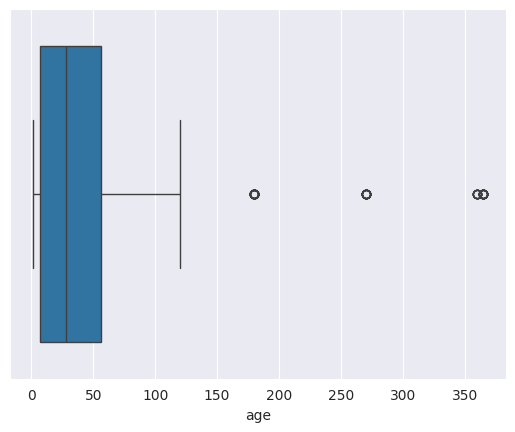

In [3]:
sns.boxplot(x='age',data=data)

In [4]:
# Fonction pour détecter et remplacer les valeurs aberrantes avec les Bounds
def replace_outliers(df):
    for col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

In [5]:
replace_outliers(data)

<Axes: xlabel='age'>

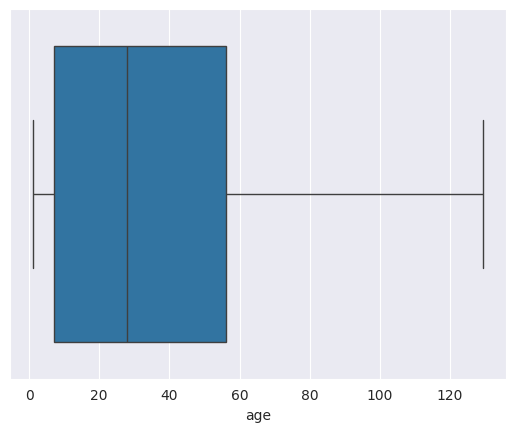

In [13]:
sns.boxplot(x='age',data=data)

<Axes: >

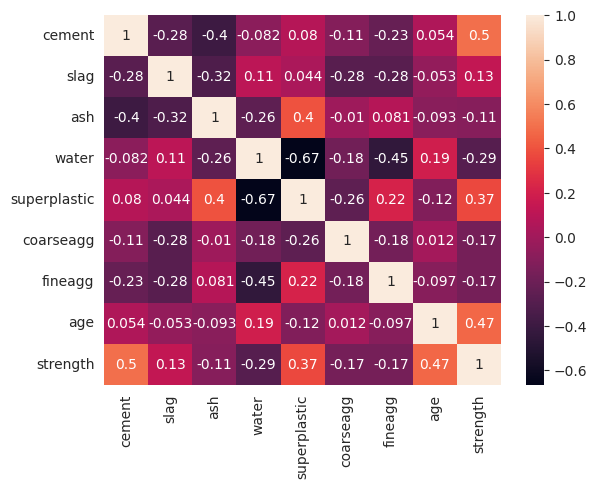

In [6]:
sns.heatmap(data.corr(),annot=True)

In [7]:
X = data.drop(['strength'],axis=1)
y= data[['strength']]

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

In [9]:
X_train

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
11,198.6,132.4,0.0,192.0,0.0,978.4,825.5,28.0
438,167.0,75.4,167.0,164.0,7.9,1007.3,770.1,28.0
218,190.3,0.0,125.2,161.9,9.9,1088.1,802.6,100.0
110,286.3,200.9,0.0,144.7,11.2,1004.6,803.7,7.0
788,349.0,0.0,0.0,192.0,0.0,1047.0,806.0,7.0
...,...,...,...,...,...,...,...,...
671,236.0,157.0,0.0,192.0,0.0,972.6,749.1,7.0
985,255.3,98.8,77.0,188.6,6.5,919.0,749.3,28.0
31,266.0,114.0,0.0,228.0,0.0,932.0,670.0,129.5
804,393.0,0.0,0.0,192.0,0.0,940.0,758.0,28.0


In [35]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [36]:
#CONSTRUIRE UN RESEAU NEURONAL de type ANN
import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(30,input_dim=X_train.shape[1],activation='relu'))
model.add(Dense(10,activation='relu'))
# model.add(Dense(100,activation='relu'))
model.add(Dense(1,activation='linear'))


/home/ariel/PycharmProjects/enronmails/venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [37]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                │ (None, 30)             │           270 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 10)             │           310 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 591 (2.31 KB)

 Trainable params: 591 (2.31 KB)

 Non-trainable params: 0 (0.00 B)

In [38]:
#Compilation de l'ANN
#mean_square_error pour la regression
model.compile(optimizer='adam', loss='mse')

In [39]:
#Entrainement
ann_model = model.fit(X_train_sc,y_train,batch_size=32,epochs=500, validation_split=0.2)

Epoch 1/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1643.6663 - val_loss: 1651.4012
Epoch 2/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1507.3219 - val_loss: 1625.6501
Epoch 3/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1508.7117 - val_loss: 1598.2567
Epoch 4/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1545.8964 - val_loss: 1565.7568
Epoch 5/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1463.6219 - val_loss: 1526.6913
Epoch 6/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1429.4305 - val_loss: 1477.8007
Epoch 7/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1372.9620 - val_loss: 1420.0575
Epoch 8/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1334.0961 - val_loss: 1352.4756
Epoch 9/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1201.4462 - val_loss: 1272.4261
Epoch 10/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1179.1626 - val_loss: 1178.7800
Epoch 11/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1045.7559 - val_loss: 1068.80

# Evaluation du modèle

In [40]:
# Afficher les paramètres du loss
ann_model.history.keys()

dict_keys(['loss', 'val_loss'])

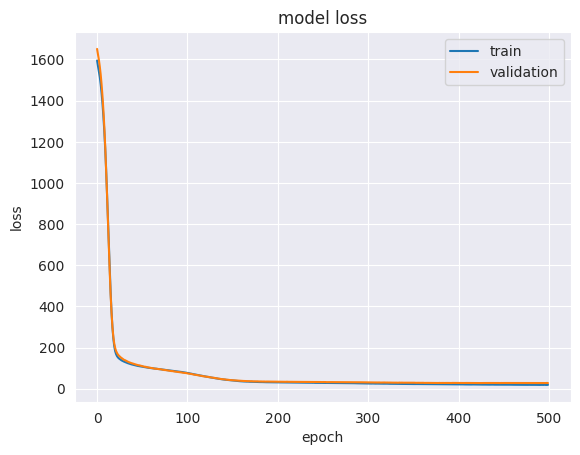

In [41]:
# Afficher le graphique du loss et du val_loss
plt.plot(ann_model.history['loss'])
plt.plot(ann_model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [43]:
# calcul des métriques
y_pred = model.predict(X_test_sc)
y_pred

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[38.933758 ],
       [ 9.533585 ],
       [40.68628  ],
       [31.012283 ],
       [25.789913 ],
       [10.118079 ],
       [32.254536 ],
       [17.246334 ],
       [12.865793 ],
       [65.66184  ],
       [18.389414 ],
       [42.17304  ],
       [65.72171  ],
       [41.021564 ],
       [70.64273  ],
       [39.15924  ],
       [30.34345  ],
       [54.790993 ],
       [44.48318  ],
       [26.290142 ],
       [14.96895  ],
       [18.365416 ],
       [39.432705 ],
       [42.008003 ],
       [43.884037 ],
       [30.85241  ],
       [52.066517 ],
       [12.360678 ],
       [10.449149 ],
       [33.911915 ],
       [45.3248   ],
       [22.756151 ],
       [30.824657 ],
       [32.84795  ],
       [12.593405 ],
       [48.146973 ],
       [30.913635 ],
       [12.60542  ],
       [42.25713  ],
       [12.94526  ],
       [65.839325 ],
       [37.552505 ],
       [55.83327  ],
       [17.524265 ],
       [39.073757 ],
       [48.272984 ],
       [ 8.96583  ],
       [26.40

In [46]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from math import sqrt

MSE = mean_squared_error(y_test,y_pred)
MAE = mean_absolute_error(y_test,y_pred)
R2 = r2_score(y_test,y_pred)

print("MSE = ", MSE)
print("MAE = ", MAE)
print("R2 = ", R2)

MSE =  36.52598729180404
MAE =  4.445217687104099
R2 =  0.8556587100028992


In [48]:
X_train.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
11,198.6,132.4,0.0,192.0,0.0,978.4,825.5,28.0
438,167.0,75.4,167.0,164.0,7.9,1007.3,770.1,28.0
218,190.3,0.0,125.2,161.9,9.9,1088.1,802.6,100.0
110,286.3,200.9,0.0,144.7,11.2,1004.6,803.7,7.0
788,349.0,0.0,0.0,192.0,0.0,1047.0,806.0,7.0


In [50]:
#prediction de la force du ciment
test = np.array([[200, 95, 12, 145, 11.2, 1000, 857, 225]])
test1 = model.predict(test)
test1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


array([[15408.651]], dtype=float32)